# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather/?q="
para = f"&appid={weather_api_key}"
unit = "&units=metric"


# Define an empty list to fetch the weather data for each city
city_data = []

    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}{para}{unit}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  pd.to_datetime(city_weather["dt"], unit='s')
#          

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ornskoldsvik
Processing Record 3 of Set 1 | bara
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | richards bay
Processing Record 8 of Set 1 | contai
Processing Record 9 of Set 1 | bol
Processing Record 10 of Set 1 | buala
Processing Record 11 of Set 1 | havelock
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | nsanje
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | temerloh
Processing Record 38 of Set 4 | lensk
Processing Record 39 of Set 4 | hastings
Processing Record 40 of Set 4 | ngunguru
Processing Record 41 of Set 4 | noumea
Processing Record 42 of Set 4 | tomatlan
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | general roca
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | varhaug
Processing Record 47 of Set 4 | manicore
Processing Record 48 of Set 4 | woodward
Processing Record 49 of Set 4 | vila
Processing Record 0 of Set 5 | kaeo
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | dharchula
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | thinadhoo
Processing Record 6 of Set 5 | mandalgovi
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | kaspiyskiy
Processing Record 9 of Set 5 | kasane
Processing Record 10 of Set 5 | myrtle grove
Processing Record 11 of Set 5 | sao joa

Processing Record 29 of Set 8 | praia da vitoria
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | zhicheng
Processing Record 34 of Set 8 | samusu
City not found. Skipping...
Processing Record 35 of Set 8 | ust-maya
Processing Record 36 of Set 8 | tougue
Processing Record 37 of Set 8 | bredasdorp
Processing Record 38 of Set 8 | ambulu
Processing Record 39 of Set 8 | nguiu
City not found. Skipping...
Processing Record 40 of Set 8 | pansemal
Processing Record 41 of Set 8 | berdigestyakh
Processing Record 42 of Set 8 | nayudupeta
Processing Record 43 of Set 8 | boende
Processing Record 44 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 8 | hanzhong
Processing Record 46 of Set 8 | helong
Processing Record 47 of Set 8 | camacha
Processing Record 48 of Set 8 | belen
Processing Record 49 of Set 8 | margate
Processing Record 0 of Set 9 | adrar
Processing Record 1 of Set 

Processing Record 17 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 18 of Set 12 | pec
Processing Record 19 of Set 12 | huaihua
Processing Record 20 of Set 12 | jinka
Processing Record 21 of Set 12 | dinsor
City not found. Skipping...
Processing Record 22 of Set 12 | kodinsk
Processing Record 23 of Set 12 | carutapera
Processing Record 24 of Set 12 | haikou
Processing Record 25 of Set 12 | chipinge
Processing Record 26 of Set 12 | longyearbyen
Processing Record 27 of Set 12 | mount gambier
Processing Record 28 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 29 of Set 12 | tres arroyos
Processing Record 30 of Set 12 | morwell
Processing Record 31 of Set 12 | metabetchouan
City not found. Skipping...
Processing Record 32 of Set 12 | shaartuz
City not found. Skipping...
Processing Record 33 of Set 12 | kananga
Processing Record 34 of Set 12 | erzin
Processing Record 35 of Set 12 | harper
Processing Record 36 of Set 12 | bargal
City not found. Ski

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,26.89,76,38,6.67,PF,2023-03-30 15:51:25
1,ornskoldsvik,63.2909,18.7153,-0.47,51,0,5.14,SE,2023-03-30 15:51:25
2,bara,10.3744,10.7288,38.36,6,41,3.21,NG,2023-03-30 15:51:26
3,arraial do cabo,-22.9661,-42.0278,29.98,70,40,5.14,BR,2023-03-30 15:51:26
4,pevek,69.7008,170.3133,-26.42,99,87,3.29,RU,2023-03-30 15:51:27


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.89,76,38,6.67,PF,2023-03-30 15:51:25
1,ornskoldsvik,63.2909,18.7153,-0.47,51,0,5.14,SE,2023-03-30 15:51:25
2,bara,10.3744,10.7288,38.36,6,41,3.21,NG,2023-03-30 15:51:26
3,arraial do cabo,-22.9661,-42.0278,29.98,70,40,5.14,BR,2023-03-30 15:51:26
4,pevek,69.7008,170.3133,-26.42,99,87,3.29,RU,2023-03-30 15:51:27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

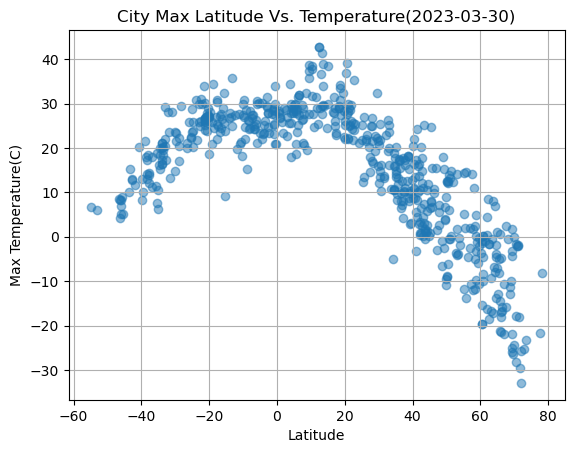

In [83]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=0.5)
           

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid() 



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

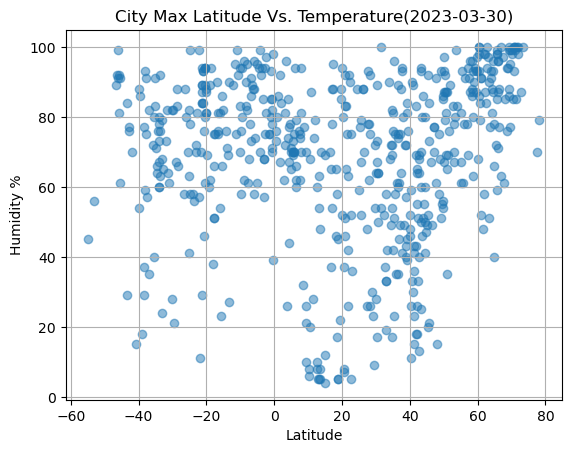

In [84]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

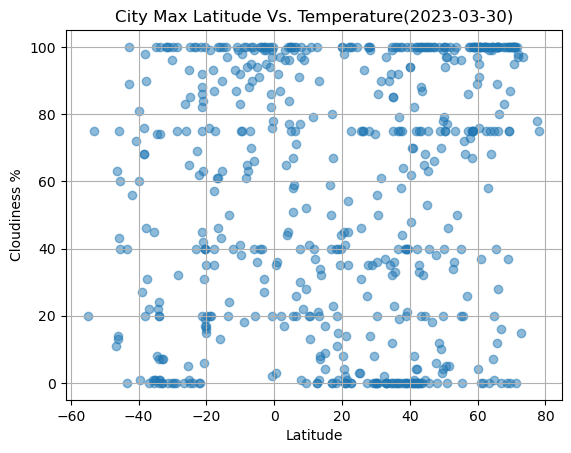

In [85]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

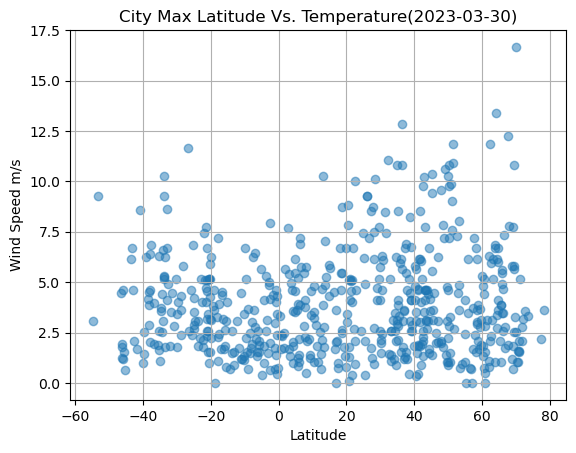

In [86]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE